In [1]:
#선형회귀
#릿지, 라쏘 회귀
#다항회귀
#경사하강법
#로지스틱회귀

In [2]:
#MSE (Mean Square Error): 평범 그 자체인듯, 모든 샘플에 대해 수행.
#argmin_theta[ sum((theta*Xi-yi)^2) ]

![n1](image/img1.png)

In [3]:
import numpy as np
import pandas as pd

In [4]:
X = 2*np.random.rand(100,1)
#rand함수는 0과 1사이에서 균등하게 난수를 발생시킨다.
y = 4 + 3*X+np.random.randn(100,1)
#randn은 표준 분포에 대한 난수를 만들기 때문에, 정규분포이다. 평균이 0이고 표준편차가 1이다.

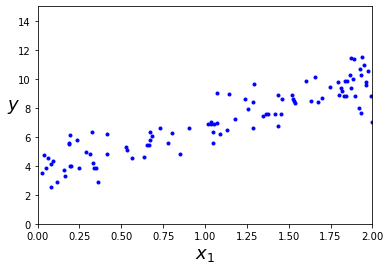

In [5]:
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가한다. 절편이 붙는다..

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#np.linalg.inv -> 역행렬구하기 함수.
theta_best
# 0:절편
# 1: 기울기.

array([[3.66193483],
       [3.1479419 ]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.66193483],
       [9.95781863]])

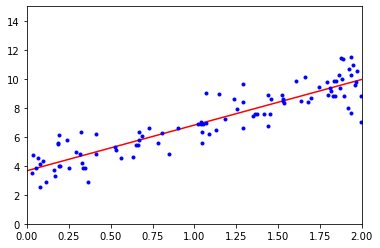

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.66193483]), array([[3.1479419]]))

In [10]:
lin_reg.predict(X_new)

array([[3.66193483],
       [9.95781863]])

In [11]:
theta_best_svd, residuals, rank, s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd
#lstsq : least squares

array([[3.66193483],
       [3.1479419 ]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.66193483],
       [3.1479419 ]])

# 배치 경사하강법
- 비용 함수를 최소화하기 위해 반복적으로 모델 파라미터를 조정
- 경사 하강법의 문제 : local, global 해가 다를 수 있기때문
- 데이터의(theta1, theta2) Scale을 맞춰줘야하는 이유가 된다.

In [13]:
eta = 0.1 #학습률
n_iteration = 1000
m =100

theta = np.random.randn(2,1) # 랜덤초기화

for iteration in range(n_iteration):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    #MSE 미분값으로 gradient 계산
    theta = theta - eta * gradients
    #에타를 통해 너무 급하지 않게

In [14]:
theta

array([[3.66193483],
       [3.1479419 ]])

In [15]:
X_new_b.dot(theta)

array([[3.66193483],
       [9.95781863]])

In [16]:
theta_path_bgd=[]

def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(X_b)
    plt.plot(X,y,"b.")
    n_iterations=1000
    for iteration in range(n_iterations):
        if iteration <10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration>0 else "r--"
            plt.plot(X_new, y_predict,style)
            
        gradients=2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradients
        
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta),fontsize=16)
    

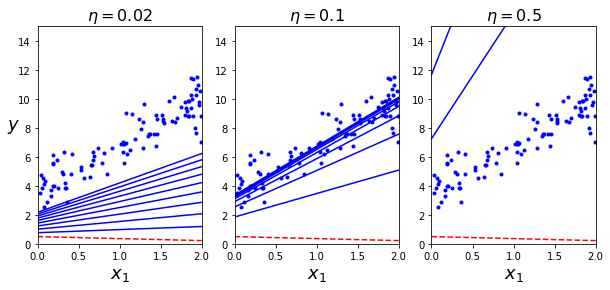

In [17]:
np.random.seed(42)
theta=np.random.randn(2,1) #random initialize

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132); plot_gradient_descent(theta,eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta,eta=0.5)

# 확률적 경사 하강법

- 에포크 시작 -> 훈련세트 섞기 -> 훈련세트에서 샘플 하나 꺼내기, 경사 하강법 수행, 모델 파라미터 수정, 반복-> 훈련세트 섞기 -> ?

In [18]:
theta_path_sgd=[]
m=len(X_b)
np.random.seed(42)

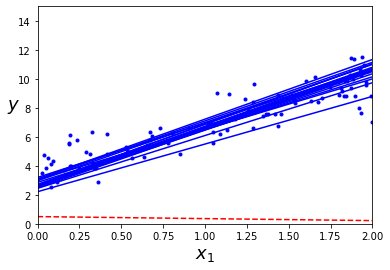

In [19]:
n_epochs=50
t0, t1 = 5,50 #학습 스케줄 하이퍼파라미터

#에타값을 점점 줄인다..?.
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i<20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1] #중복을 허용한다라..
        yi=y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None,eta0=0.1,random_state=42)
#여기서 eta0는 위에서의 eta와는 조금 다르다..
#learning_rate -> invscaling과 관련,,
sgd_reg.fit(X,y.ravel())
#ravel 함수로 편다음에 전달..

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [22]:
sgd_reg.coef_, sgd_reg.intercept_

(array([3.09517814]), array([3.64508624]))

# 미니배치 경사 하강법

In [24]:
theta_path_mgd=[]

n_iterations=50
minibatch_size=20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1=200,1000
def learning_schedule(t):
    return t0/(t+t1)

t=0

for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta -eta*gradients
        theta_path_mgd.append(theta)

In [25]:
theta

array([[3.64512634],
       [3.10634188]])

In [26]:
theta_path_bgd=np.array(theta_path_bgd)#배치경사하강법
theta_path_sgd=np.array(theta_path_sgd)#확률적경사배치
theta_path_mgd=np.array(theta_path_mgd)#미니배치

Text(0, 0.5, '$\\theta_1$')

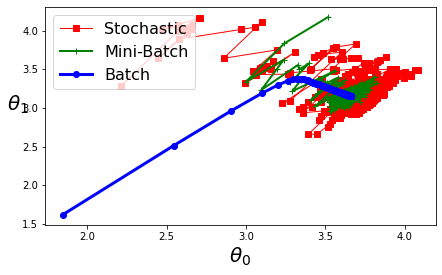

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth=2,label="Mini-Batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth=3,label="Batch")

plt.legend(loc="upper left",fontsize=16)
plt.xlabel(r"$\theta_0$",fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20,rotation=0)

# 다항회귀

In [3]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
np.random.seed(42)

In [4]:
m=100

X= 6*np.random.rand(m,1)-3

y=0.5*X**2 + 2+np.random.randn(m,1)

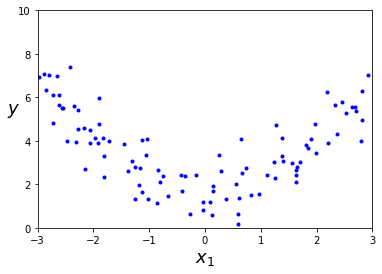

In [5]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
# include_bias = True 편향을 위한 특성 1?
# -> 절편을 위한 것이라고 생각하면 된다. 절편이 즉 Bias라고 할 수 있다.

# model.intercept_, model.coef_ -> 
poly_features = PolynomialFeatures(degree=2, include_bias =False)
X_poly = poly_features.fit_transform(X)
#fit이랑 transform을 합친거임.

print(X_poly[0])

[-0.75275929  0.56664654]


In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False)
# fit_intercept False를 하면 절편을 fitting 하지않게된다.
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(0.0, array([[-0.05552599,  0.89363166]]))

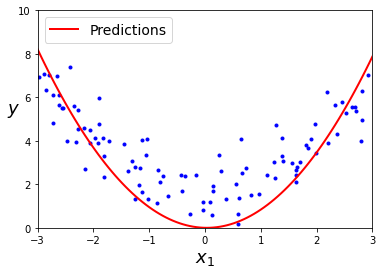

In [8]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
#degree가 2인 2차방정식에 맞추기 위해서 transform 시킨다..
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

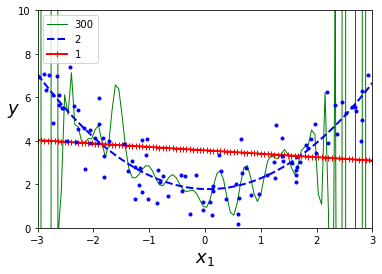

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1,300), ("b--",2,2),("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler=StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    
    polynomial_regression.fit(X,y) 
    #poly_features에서 transform 된 값을 linearRegression에 넣지 않고.
    #fit으로만 처리.
    y_newbig=polynomial_regression.predict(X_new)
    #print(polynomial_regression['lin_reg'].coef_)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
    
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()


#여기서 Standard Scaler 를 안 쓸경우 계산이 잘 안된다..
#Data의 스케일이 다를 경우 해줘야 한다.
#LinearRegression(normalize=True)로 같은 효과를 낼 수 있다.

## func: plot_learning_curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors, test_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict=model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        test_errors.append(mean_squared_error(y_test,y_test_predict))
        
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(test_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)

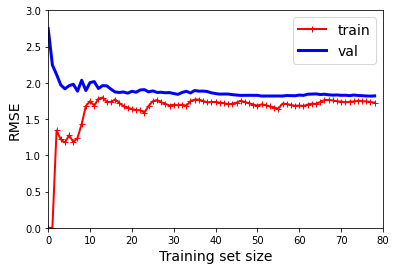

In [20]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

In [ ]:
# 이 그래프를 보고 과소적합을 의심할 수 있다...?

#1. 너무 빠르게 수렴되었다는 점.
#2. 간격이 계속 유지된다는 점..


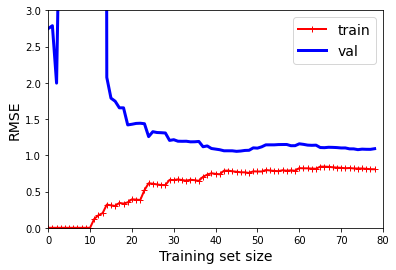

In [22]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),## 10으로 바꿔줌. 과소적합을 해결하기 위함.
    ("lin_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

In [26]:
#1. 상대적으로 뒤늦게 수렴이 되고
#2. 전체적으로 MSE는 내려갔고.
#3. 뒤로 갈 수록 다시 간격이 벌어진다

# 규제가 있는 모델

## L2(Ridge) 손실
- J($\theta$)=MES($\theta$)+$\alpha$ /2 $\sum_{i=1}^N$  $\theta^2$


In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [4]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [5]:
ridge_reg=Ridge(alpha=1,solver="sag",random_state=42, max_iter=1000)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### plot_model

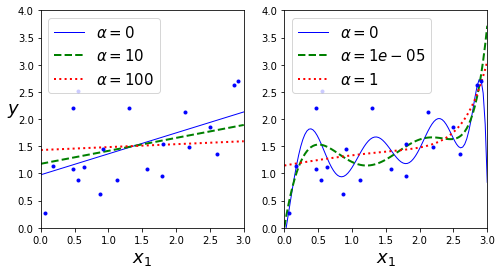

In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas,("b-","g--","r:")):
        model=model_class(alpha, **model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model=Pipeline([
                ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg",model)
            ])
        model.fit(X,y)
        y_new_regul=model.predict(X_new)
        lw= 2 if alpha>0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha={}$".format(alpha))
    
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,3,0,4])
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False, alphas=(0,10,100),random_state=42)

plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)

plt.show()

In [7]:
# 규제가 있는 것은 페널티 함수에서 theta값의 영향을 받기 때문에 치우치지 않게 하기 위해서
# Scaler를 해야한다.

In [8]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000,tol=1e-3,random_state=42)
#L2 : Ridge Model의 손실함수
#L2인 이유는 제곱이기 때문
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## L1(Lasso) 손실
- - J($\theta$)=MES($\theta$)+$\alpha$ $\sum_{i=1}^N$ $\left\lvert \theta_i \right\rvert$

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827458, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


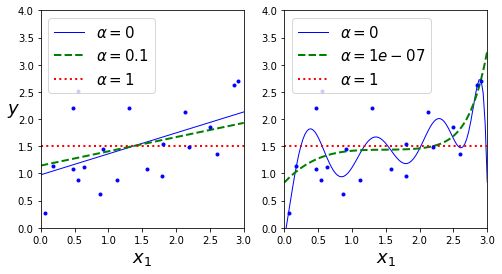

In [9]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso,polynomial=True, alphas=(0,10**-7,1),random_state=42)

plt.show()

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827458, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


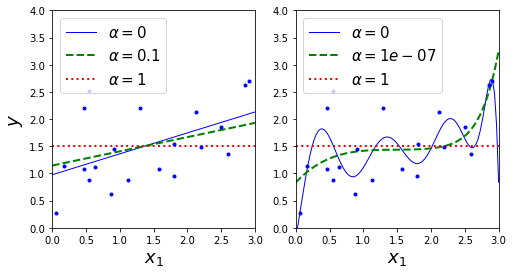

In [10]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=90,fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-7,1),random_state=42)

plt.show()

Alpha를 키울수록 완만해진다라고 봐야한다

## Elastic Net

- Lasso, Ridge 합?

$$ J(\theta) = MSE(\theta)+r\alpha \sum_{i=1}^N \left\lvert \theta_i \right\rvert + \frac{1-r}{2}\alpha \sum_{i=1}^N  \theta^2$$

In [11]:
import numpy as np
import pandas as pd

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42)
#여기서 L1 Ratio가 r을 의미한다.
#Lasso == ElasticNet(l1_ratio=1)
#Ridge !=ElasticNet(l1_ratio=0)
# -> 방식이 조금 다르기 때문.
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [13]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=2+X+0.5*X**2 + np.random.randn(m,1)

X_train, X_test, y_train, y_test = train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)

조기종료:
1.어느정도 test/train 이 수렴하거나
2.train이 더 나빠지나

In [14]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
    #여기에는 모델을 넣어주지 않음.
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,
                      penalty=None, learning_rate="constant",eta0=0.0005,random_state=42)
#learning_rate : 기본값. scaling
#eta0 학습률?


minimum_val_error = float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    val_error = mean_squared_error(y_test,y_test_predict)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    

그래프를 그린다.

## Figure Best Model

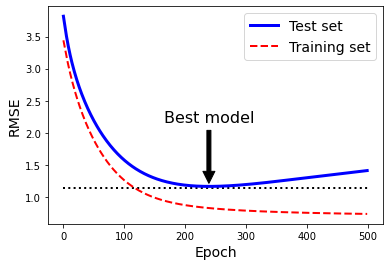

In [15]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant",eta0=0.0005,random_state=42)

n_epochs=500
train_errors, test_errors=[],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict=sgd_reg.predict(X_train_poly_scaled)
    y_test_predict=sgd_reg.predict(X_test_poly_scaled)
    train_errors.append(mean_squared_error(y_train,y_train_predict))
    test_errors.append(mean_squared_error(y_test,y_test_predict))
    
best_epoch = np.argmin(test_errors)
best_test_rmse = np.sqrt(test_errors[best_epoch])

#화살표 작성
plt.annotate('Best model',
            xy=(best_epoch,best_test_rmse),
            xytext=(best_epoch, best_test_rmse+1),
            ha="center",
            arrowprops=dict(facecolor='black',shrink=0.05),
             fontsize=16,
            )

best_test_rmse -=0.03
plt.plot([0,n_epochs],[best_test_rmse,best_test_rmse],"k:",linewidth=2)
plt.plot(np.sqrt(test_errors),"b-",linewidth=3,label="Test set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2, label="Training set")

plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [16]:
best_epoch, minimum_val_error, best_model

(239,
 1.3513110512453872,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [17]:
#scikit learn library에서 조기종료 사용방법
sgd_reg = SGDRegressor(penalty=None,learning_rate="constant",eta0=0.0005, random_state=42,
                      early_stopping=True, tol=0.001)
#0.001 만큼 5회(early stop의 default value) 이상 좋아지지 않으면 early_stop한다.

sgd_reg.fit(X_train_poly_scaled, y_train)
y_test_predict = sgd_reg.predict(X_test_poly_scaled)
mean_squared_error(y_test,y_test_predict), sgd_reg.n_iter_

(0.8987688364730189, 293)

## Lasso Regulation vs Ridge Regulation

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
t1a, t1b, t2a, t2b= -1,3,-1.5,1.5

t1s = np.linspace(t1a,t1b,500)
t2s = np.linspace(t2a,t2b,500)

t1,t2=np.meshgrid(t1s,t2s)
T=np.c_[t1.ravel(),t2.ravel()]
Xr=np.array([[1,1],[1,-1],[1,0.5]])
yr=2*Xr[:,:1]+0.5*Xr[:,1:]

J=(1/len(Xr)*np.sum((T.dot(Xr.T)-yr.T)**2, axis=1)).reshape(t1.shape)

N1=np.linalg.norm(T,ord=1,axis=1).reshape(t1.shape)
N2=np.linalg.norm(T,ord=2,axis=1).reshape(t1.shape)

t_min_idx=np.unravel_index(np.argmin(J),J.shape)
t1_min, t2_min = t1[t_min_idx],t2[t_min_idx]

t_init=np.array([[0.25],[-1]])

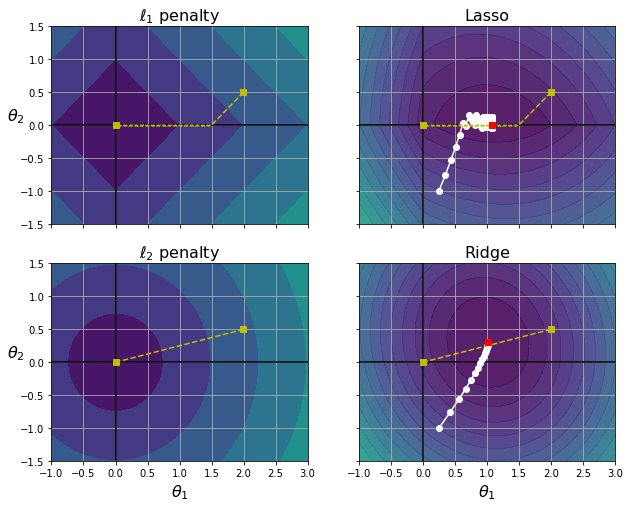

In [21]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()